# Support Vector Machine

Soit le jeu d'entraînement suivant:
$$ \mathcal{D} = \{ (x_i,y_i)\}_{1\leq{}i\leq{}n} $$ avec
$$ x_i\in\mathbb{R}^d \quad \& \quad y_i=\pm{}1 \quad(\forall i\in [1:n])$$

Le problème est de trouver un hyperplan séparant les données selon leurs équiettes.

Un hyperplan dans $\mathbb{R}^d$ s'écrit: $\quad f(x) := w^\intercal{}x+b\quad$ où $w\in\mathbb{R}$ est le vecteur normal à l'hyperplan, et $b\in\mathbb{R}$ est le biais.

De sorte qu'une fois le modèle entrainé, la prédiction d'appartenance à une classe se fera selon le signe de $f$ pour cette donnée.
Autrement dit, $$\hat{y} = \mathrm{sign} f(x)$$

Afin de réduire les erreurs de classification, nous souhaitons en même temps maximiser la __marge__ entre les données d'entrainement.
Plus exactement, la marge est définie comme la distance entre l'hyperplan et les points les plus proches (ie. les vecteurs supports.)

La distance entre un point $x_i$ et l'hyperplan est donnée par: $\quad\dfrac{|w^\intercal{}x_i + b|}{||w||}$.

Ainsi, maximiser la marge est équivalent à minimiser $||w||²$ sous les contraintes $y_i\cdot(w^\intercal{}x_i+b)\geq{}1$ pour tout $i=1,\ldots,n$.


## Cas linéairement séparable

En dimension 2, lorsque les données sont séparables par une droite,

Le problème se résume ainsi:

$$ \min_{w,b} \frac{1}{2}||w||² \quad\text{avec }\quad y_i\cdot(w^\intercal{}x_i+b)\geq{}1 \quad (\forall{}i=1,\ldots,n)$$

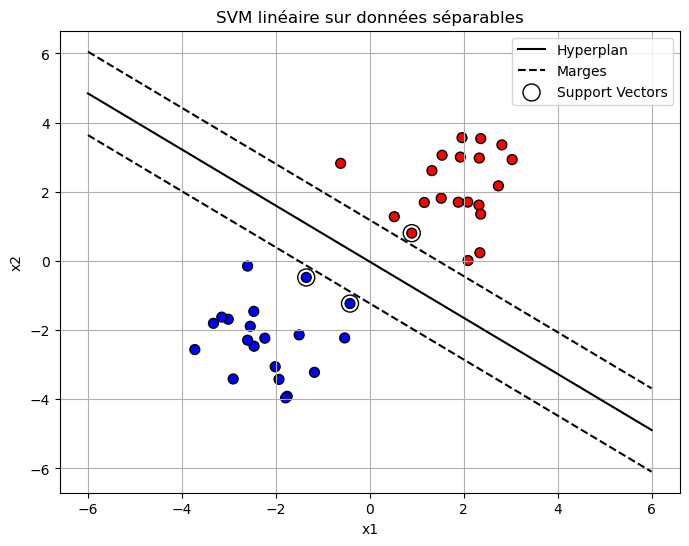

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Génération de données linéairement séparables
np.random.seed(42)
# Classe -1
X_neg = np.random.randn(20, 2) - [2, 2]
# Classe +1
X_pos = np.random.randn(20, 2) + [2, 2]

X = np.vstack((X_neg, X_pos))
y = np.hstack((-1 * np.ones(20), +1 * np.ones(20)))

# Entraînement d'un SVM linéaire
clf = svm.SVC(kernel='linear', C=1e5)
clf.fit(X, y)

# Récupération des poids (w) et du biais (b)
w = clf.coef_[0]
b = clf.intercept_[0]

# Affichage
plt.figure(figsize=(8, 6))

# Points de données
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, s=50, edgecolors='k')

# Hyperplan : w0*x + w1*y + b = 0 → y = (-w0*x - b)/w1
x_plot = np.linspace(-6, 6, 100)
y_plot = -(w[0] * x_plot + b) / w[1]
plt.plot(x_plot, y_plot, 'k-', label="Hyperplan")

# Marges : y = (-w0*x - b ± 1)/w1
margin = 1 / np.linalg.norm(w)
y_margin_up = y_plot + margin
y_margin_down = y_plot - margin
plt.plot(x_plot, y_margin_up, 'k--', label="Marges")
plt.plot(x_plot, y_margin_down, 'k--')

# Vecteurs de support
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=150, facecolors='none', edgecolors='k', label="Support Vectors")

plt.title("SVM linéaire sur données séparables")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()


## Cas non séparable : *soft margin* ou SVM souple

Nous introduisons des variable dite de relâchement $\xi_i\geq{}0$ pour permettre quelques erreurs.

Le problème devient: 
$$ \min_{w,b,\xi} \frac{1}{2}||w||² + C\sum_{i=0}^n\,\xi_i \quad\text{avec }\quad y_i\cdot(w^\intercal{}x_i+b)\geq{}1 - \xi_i \quad (\forall{}i=1,\ldots,n)$$
où $C>0$ est un paramètre de régularisation qui contrôle le compromis entre le marge large et les erreurs.

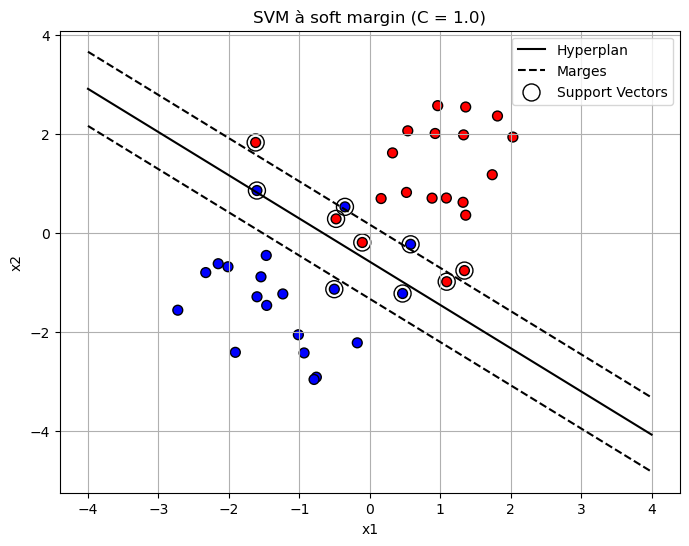

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Génération de données NON linéairement séparables
np.random.seed(42)
# Classe -1
X_neg = np.random.randn(20, 2) - [1, 1]
# Classe +1
X_pos = np.random.randn(20, 2) + [1, 2]

X = np.vstack((X_neg, X_pos))
y = np.hstack((-1 * np.ones(20), +1 * np.ones(20)))

# SVM à soft margin (C plus faible)
clf = svm.SVC(kernel='linear', C=1.0)  # C petit => tolère plus d'erreurs
clf.fit(X, y)

# Paramètres du modèle
w = clf.coef_[0]
b = clf.intercept_[0]

# Tracé de l'hyperplan et des marges
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, s=50, edgecolors='k')

# Hyperplan : w0*x + w1*y + b = 0
x_plot = np.linspace(-4, 4, 100)
y_plot = -(w[0] * x_plot + b) / w[1]
plt.plot(x_plot, y_plot, 'k-', label='Hyperplan')

# Marges
margin = 1 / np.linalg.norm(w)
y_margin_up = y_plot + margin
y_margin_down = y_plot - margin
plt.plot(x_plot, y_margin_up, 'k--', label='Marges')
plt.plot(x_plot, y_margin_down, 'k--')

# Vecteurs de support
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=150, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title("SVM à soft margin (C = 1.0)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()


## Cas non linéaire: SVM à noyaux


Lorsque le problème n'est pas linéaire, nous utilisons un *noyau* dont le but est de transformer l'espace afin de rendre les données séparables.

Maximiser la marge revient donc au problème suivant:

$$\max_\alpha \sum_{i=1}^{n}\alpha_i - \dfrac{1}{2}\sum_{i,j} \alpha_i\alpha_jy_iy_jK(x_i,x_j)$$

sous les contraintes: $0\leq \alpha_i \leq C \quad(\forall{}i\in|[1,n]|)\quad \text{et} \quad \sum_{i=1}^n \alpha_iy_i = 0$

où $C$ contrôle la marge.

La prédiction devient: $\hat{y}(x) = \mathrm{sign}\Big(\sum_{i=1}^n \alpha_iy_iK(x_i,x) + b \Big)$

| Noyau              | Formule                                       | Utilisation typique                    |
| ------------------ | --------------------------------------------- | -------------------------------------- |
| **Linéaire**       | $K(x_i, x_j) = x_i \cdot x_j$                 | Données linéaires                      |
| **Polynôme**       | $K(x_i, x_j) = (x_i \cdot x_j + c)^d$         | Cas de frontières polynomiales         |
| **RBF (gaussien)** | $K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)$ | Données complexes, séparées en courbes |
| **Sigmoïde**       | $\tanh(\kappa x_i \cdot x_j + \theta)$        | Rarement utilisé seul                  |


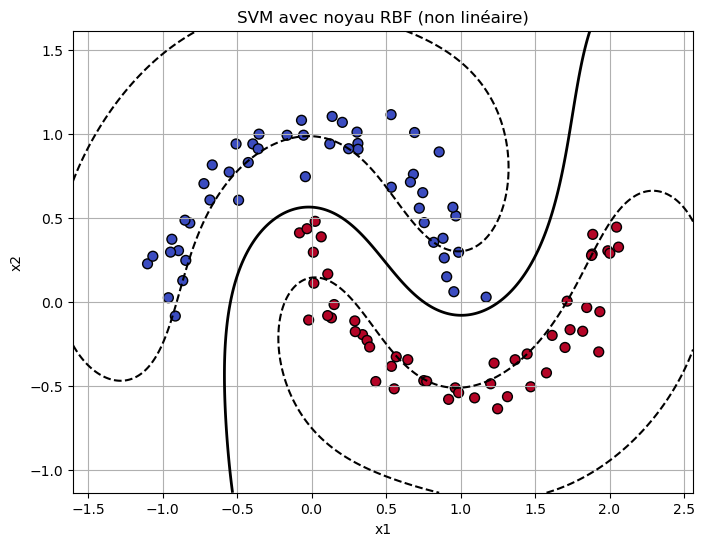

In [11]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Données non linéaires
X, y = make_moons(n_samples=100, noise=0.1, random_state=0)

# SVM avec noyau RBF
clf = SVC(kernel='rbf', C=1.0, gamma='scale')
clf.fit(X, y)

# Affichage
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')

# Frontière de décision
import numpy as np
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 500),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')  # hyperplan
plt.contour(xx, yy, Z, levels=[-1, 1], linestyles='--', colors='k')  # marges

plt.title("SVM avec noyau RBF (non linéaire)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()
